In [1]:
import sys
sys.path.append('../')
sys.path.append('../src/')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from src.utils import load_moons, load_monk1, load_mnist
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy, MulticlassAccuracy, MeanEuclideanError
from src.regularizers import L2, L1
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from src.callbacks import EarlyStopping, Callback

# MONK 1

In [2]:
x_train, x_val, x_test, y_train, y_val, y_test = load_monk1(0.001)

In [41]:
model = Network(17)
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer="xavier")

In [42]:
try:
    stats = model.train(
        (x_train, y_train),
        (x_test, y_test),
        metric=BinaryAccuracy(),
        loss=MeanSquaredError(),
        epochs=500,
        eta=0.01,
        nesterov=0.8,
        verbose=True,
    )
except KeyboardInterrupt:
    model.bar.close()


Training: 100%|██████████| 500/500[, loss=0.000519, val_loss=0.00191, val_acc=1]  


<AxesSubplot: >

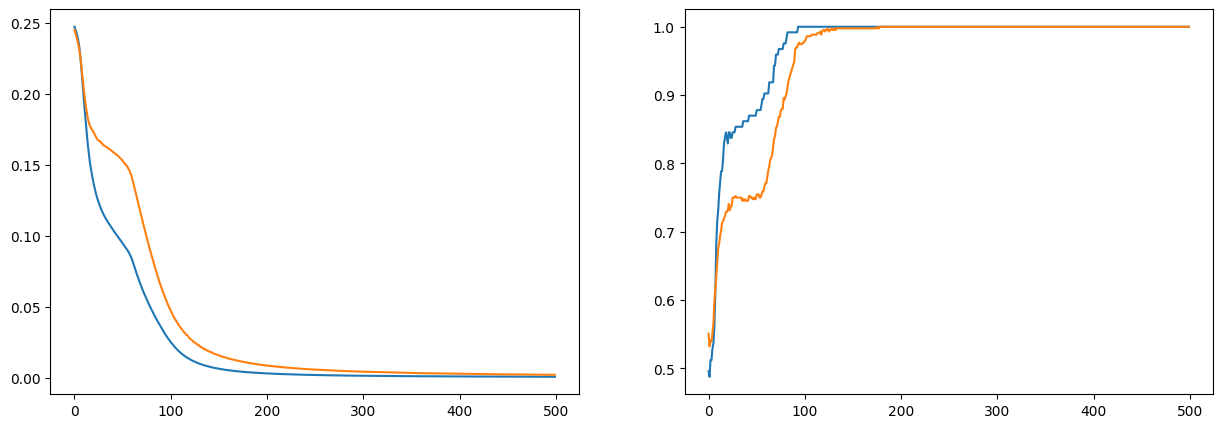

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [46]:
from src.utils import load_monk2
x_train, x_val, x_test, y_train, y_val, y_test = load_monk2(0.001)

model = Network(17)
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer="xavier")

try:
    stats = model.train(
        (x_train, y_train),
        (x_test, y_test),
        metric=BinaryAccuracy(),
        loss=MeanSquaredError(),
        epochs=500,
        eta=0.01,
        nesterov=0.8,
        verbose=True,
    )
except KeyboardInterrupt:
    model.bar.close()

Training: 100%|██████████| 500/500[, loss=0.000167, val_loss=0.00018, val_acc=1] 


## MONK 2

<AxesSubplot: >

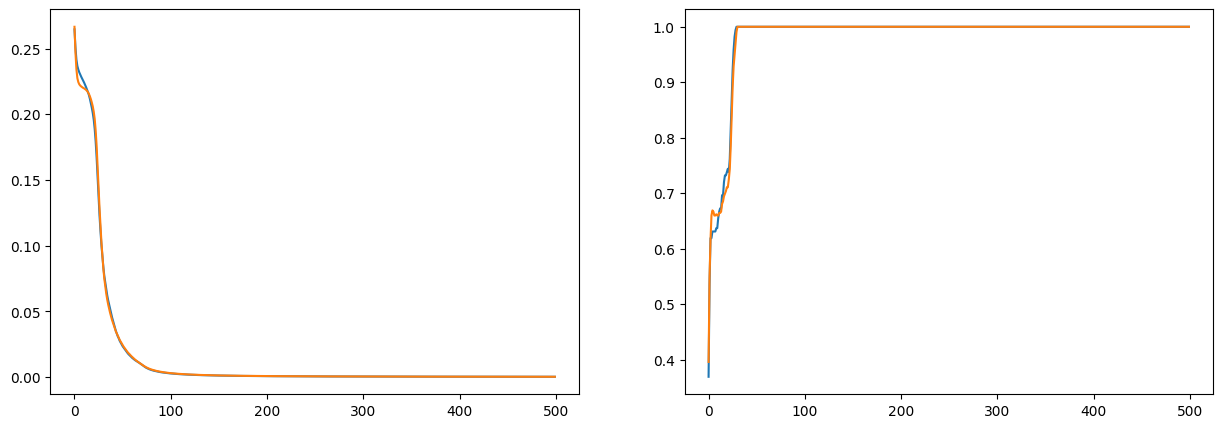

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

## MONK Test 3

#### Trying without regularizer

In [50]:
from src.utils import load_monk3
x_train, x_val, x_test, y_train, y_val, y_test = load_monk3(0.00001)

model = Network(17)
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer="xavier")

try:
    stats = model.train(
        (x_train, y_train),
        (x_test, y_test),
        metric=BinaryAccuracy(),
        loss=MeanSquaredError(),
        epochs=500,
        eta=0.01,
        nesterov=0.8,
        verbose=True,
    )
except KeyboardInterrupt:
    model.bar.close()

Training: 100%|██████████| 500/500[, loss=0.0264, val_loss=0.0614, val_acc=0.931]


<AxesSubplot: >

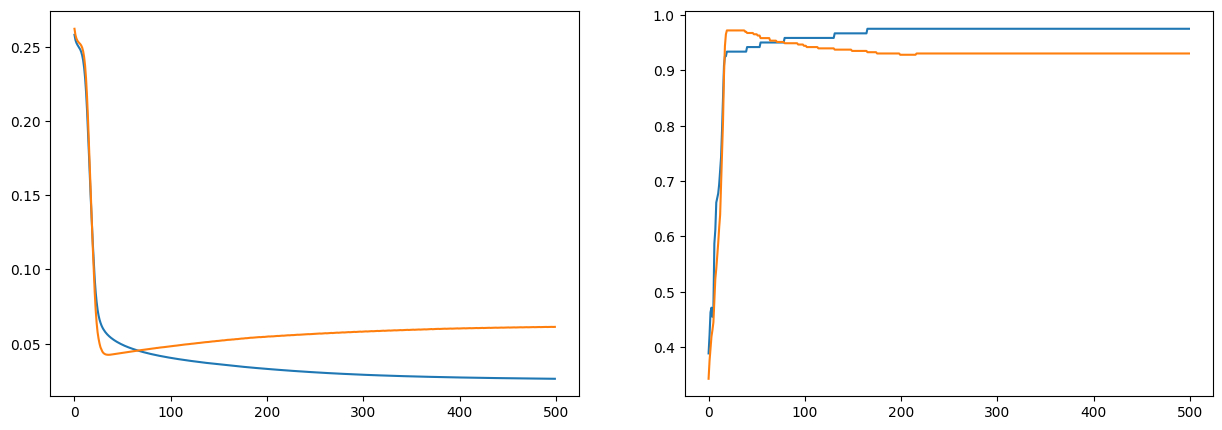

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

#### Monk's 3 without regularization started overfitting soon. Try regularizing with earlystopping.

In [57]:
model = Network(17)
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer="xavier")

try:
    stats = model.train(
        (x_train, y_train),
        (x_test, y_test),
        metric=BinaryAccuracy(),
        loss=MeanSquaredError(),
        epochs=500,
        eta=0.01,
        nesterov=0.8,
        callbacks=[EarlyStopping(patience=30)],
        verbose=True,
    )
except KeyboardInterrupt:
    model.bar.close()

Training:  11%|█▏        | 57/500[, loss=0.0448, val_loss=0.0456, val_acc=0.954]


<AxesSubplot: >

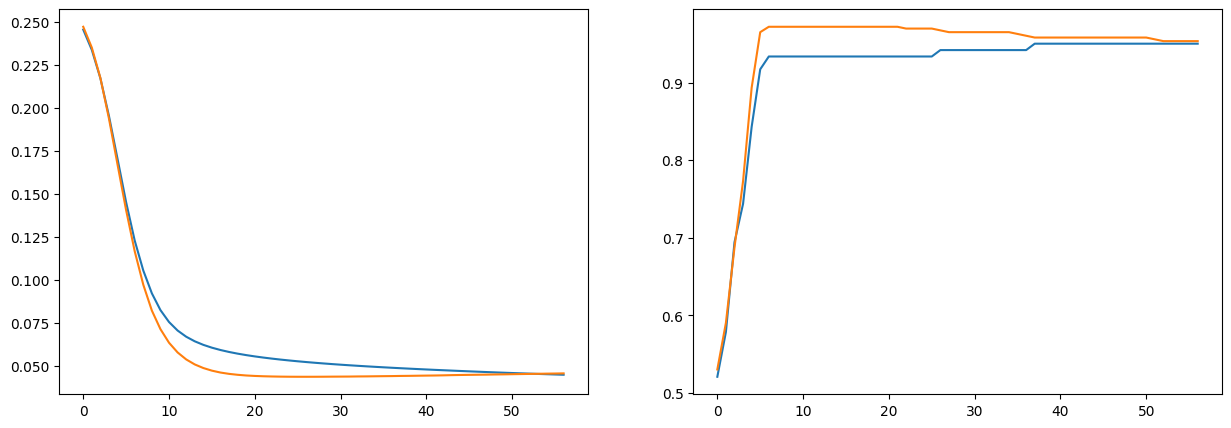

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [59]:
# compute accuracy on test set
y_pred = model.multiple_outputs(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print("Accuracy on test set: ", accuracy_score(y_test.flatten(), y_pred.flatten()))

Accuracy on test set:  0.9675925925925926


#### Much better, now try to regularize with L2 regularization.

In [66]:
from src.regularizers import L2, L1

model = Network(17, L2(1e-5))
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer="xavier")

try:
    stats = model.train(
        (x_train, y_train),
        (x_test, y_test),
        metric=BinaryAccuracy(),
        loss=MeanSquaredError(),
        epochs=500,
        eta=0.01,
        nesterov=0.8,
        callbacks=[EarlyStopping(patience=30)],
        verbose=True,
    )
except KeyboardInterrupt:
    model.bar.close()

Training:  11%|█         | 55/500[, loss=0.0467, val_loss=0.0426, val_acc=0.968]


In [67]:
# compute accuracy on test set
y_pred = model.multiple_outputs(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print("Accuracy on test set: ", accuracy_score(y_test.flatten(), y_pred.flatten()))

Accuracy on test set:  0.9722222222222222


<AxesSubplot: >

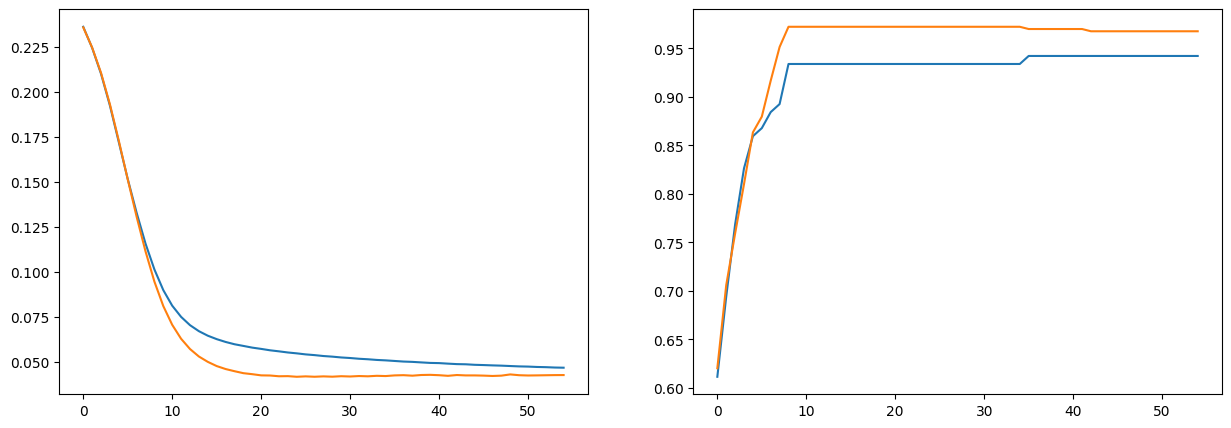

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])